In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, ExpSineSquared, ConstantKernel
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from datetime import datetime

C:\Users\Loveshant\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [7]:
#importing the Dataset
df_parkinson = pd.read_csv('train_data.txt',sep=',', header=None)

In [10]:
df_parkinson.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


In [11]:
#Based on the Attribute Information given we first remove the Non-Predictive features.
non_predictive_features = [0,28]
df_parkinson = df_parkinson.drop(columns=non_predictive_features, axis=1)
df_parkinson.head()

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,...,142.229,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,...,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23
2,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,...,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23
3,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,...,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23
4,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,...,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23


In [12]:
df_parkinson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 27 columns):
1     1040 non-null float64
2     1040 non-null float64
3     1040 non-null float64
4     1040 non-null float64
5     1040 non-null float64
6     1040 non-null float64
7     1040 non-null float64
8     1040 non-null float64
9     1040 non-null float64
10    1040 non-null float64
11    1040 non-null float64
12    1040 non-null float64
13    1040 non-null float64
14    1040 non-null float64
15    1040 non-null float64
16    1040 non-null float64
17    1040 non-null float64
18    1040 non-null float64
19    1040 non-null float64
20    1040 non-null int64
21    1040 non-null int64
22    1040 non-null float64
23    1040 non-null float64
24    1040 non-null float64
25    1040 non-null int64
26    1040 non-null float64
27    1040 non-null int64
dtypes: float64(23), int64(4)
memory usage: 219.5 KB


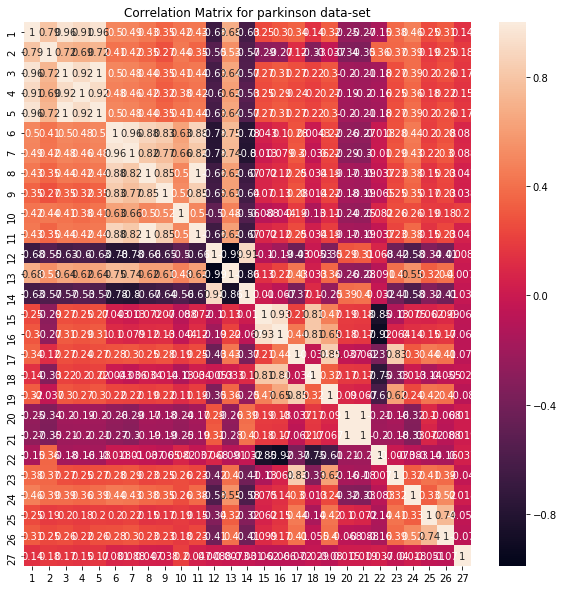

In [13]:
#Analysing Correlation between various features of the wine dataset
parkinson_corr = df_parkinson.corr()
figure, ax = plt.subplots(figsize = (10,10))
ax.set_title('Correlation Matrix for parkinson data-set')
matrix = sns.heatmap(parkinson_corr,ax=ax, annot= True)

In [14]:
#Feature Selection by dropping features having correlation less than 0.05 with target variable quality
abs_val_parkinson_corr = parkinson_corr[27].drop(27).abs()
imp_feature_idx = abs_val_parkinson_corr[abs_val_parkinson_corr > 0.05].index.values.tolist()

In [16]:
#Preparing the final dataset
x = df_parkinson[imp_feature_idx] 
y = df_parkinson[27]
#Creating Traning and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,stratify=y)

In [17]:
#Standardizing the prepared training and test data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [18]:
def svr_param_selection(X, y, nfolds):
    Kernels = ['linear', 'poly', 'rbf']
    Cs = [0.001, 0.01, 0.1, 1]
    Gammas = [0.001, 0.01, 0.1]
    param_grid = {'kernel':Kernels, 'C': Cs, 'gamma' : Gammas}
    grid_search = GridSearchCV(SVR(), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('SVR Lowest MSE Score: '+str(grid_search.best_score_))
    print('SVR With Parameters: '+str(grid_search.best_params_))    
    return grid_search.best_params_

In [19]:
def random_forest_regressor_param_selection(X, y, nfolds):
    Estimators = np.arange(1,100,15)
    Max_features = ['auto', 'sqrt']
    Min_samples_leafs = np.linspace(0.01, 0.05, 5, endpoint=True)
    param_grid = {'n_estimators': Estimators, 'max_features': Max_features, 'min_samples_leaf': Min_samples_leafs}
    grid_search = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('RandomForestRegressor Lowest MSE Score: '+str(grid_search.best_score_))
    print('RandomForestRegressor With Parameters: '+str(grid_search.best_params_))    
    return grid_search.best_params_

In [20]:
def decision_tree_regressor_param_selection(X, y, nfolds):
    Max_features = ['auto', 'sqrt']
    Min_samples_leafs = np.linspace(0.01, 0.05, 5, endpoint=True)
    param_grid = {'max_features': Max_features, 'min_samples_leaf': Min_samples_leafs}
    grid_search = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('DecisionTreeRegressor Lowest MSE Score: '+str(grid_search.best_score_))
    print('DecisionTreeRegressor With Parameters: '+str(grid_search.best_params_))    
    return grid_search.best_params_

In [21]:
def ada_boost_regressor_param_selection(X, y, nfolds):
    Estimators = np.arange(1,100,15)
    Learning_rates = [0.01,0.05,0.1,0.3]
    Losses = ['linear', 'square', 'exponential']
    param_grid = {'n_estimators': Estimators, 'learning_rate': Learning_rates, 'loss': Losses}
    grid_search = GridSearchCV(AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=0),random_state=0), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('AdaBoostRegressor Lowest MSE Score:'+str(grid_search.best_score_))
    print('AdaBoostRegressor With Parameters:'+str(grid_search.best_params_))    
    return grid_search.best_params_

In [23]:
def gaussian_regressor_param_selection(X, y, nfolds):
    kernel_rbf = ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed")
    kernel_rq = ConstantKernel(1.0, constant_value_bounds="fixed") * RationalQuadratic(alpha=0.1, length_scale=1)
    kernel_expsine = ConstantKernel(1.0, constant_value_bounds="fixed") * ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1))
    Kernels = [kernel_rbf, kernel_rq]
    param_grid = {'kernel': Kernels}
    grid_search = GridSearchCV(GaussianProcessRegressor(random_state=0), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('GaussianRegressor Lowest MSE Score:'+str(grid_search.best_score_))
    print('GaussianRegressor With Parameters:'+str(grid_search.best_params_))    
    return grid_search.best_params_

In [24]:
def linear_regressor_param_selection(X, y, nfolds):
    param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
    grid_search = GridSearchCV(LinearRegression(), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('LinearRegressor Lowest MSE Score:'+str(grid_search.best_score_))
    print('LinearRegressor With Parameters:'+str(grid_search.best_params_))    
    return grid_search.best_params_

In [25]:
def neural_network_regressor_param_selection(X, y, nfolds):
    Learning_rates = ['constant','adaptive']
    Learning_rates_init = [0.001, 0.01, 0.1, 0.3]
    Hidden_Layer_Sizes = [1, 5, 10, (5,5), (10,5)]
    Activations = ['logistic', 'tanh', 'relu']
    Alphas = [0.0001,0.002]
    param_grid = {'learning_rate': Learning_rates, 'learning_rate_init': Learning_rates_init, 'hidden_layer_sizes': Hidden_Layer_Sizes, 'activation': Activations, 'alpha': Alphas}
    grid_search = GridSearchCV(MLPRegressor(max_iter=900), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('NeuralNetworkRegressor Lowest MSE Score:'+str(grid_search.best_score_))
    print('NeuralNetworkRegressor With Parameters:'+str(grid_search.best_params_))    
    return grid_search.best_params_

In [26]:
#Using the 3-Fold HyperParam Search to evaluate the best hyperparams for each model
print("now ="+str(datetime.now()))
svr_best_param           = svr_param_selection(x_train_scaled, y_train, 3)
print("now ="+str(datetime.now()))
random_forest_best_param = random_forest_regressor_param_selection(x_train_scaled, y_train, 3)
print("now ="+str(datetime.now()))
decision_tree_best_param = decision_tree_regressor_param_selection(x_train_scaled, y_train, 3)
print("now ="+str(datetime.now()))
ada_boost_best_param     = ada_boost_regressor_param_selection(x_train_scaled, y_train, 3)
print("now ="+str(datetime.now()))
linear_best_param         = linear_regressor_param_selection(x_train_scaled, y_train, 3)
print("now ="+str(datetime.now()))
neural_network_best_param = neural_network_regressor_param_selection(x_train_scaled, y_train, 3)
print("now ="+str(datetime.now()))
gaussian_best_param       = gaussian_regressor_param_selection(x_train_scaled, y_train, 3)
print("now ="+str(datetime.now()))

now =2019-12-05 20:09:43.663348
SVR Lowest MSE Score: -0.1160127949294983
SVR With Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
now =2019-12-05 20:10:06.595774
RandomForestRegressor Lowest MSE Score: 0.1451795166131267
RandomForestRegressor With Parameters: {'max_features': 'sqrt', 'min_samples_leaf': 0.01, 'n_estimators': 91}
now =2019-12-05 20:10:34.392177
DecisionTreeRegressor Lowest MSE Score: 0.020286975043121713
DecisionTreeRegressor With Parameters: {'max_features': 'auto', 'min_samples_leaf': 0.05}
now =2019-12-05 20:10:51.558704
AdaBoostRegressor Lowest MSE Score:-0.0021099012727159353
AdaBoostRegressor With Parameters:{'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 61}
now =2019-12-05 20:11:45.632008
LinearRegressor Lowest MSE Score:0.030934124284464553
LinearRegressor With Parameters:{'copy_X': True, 'fit_intercept': True, 'normalize': False}
now =2019-12-05 20:12:01.252052


C:\Users\Loveshant\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


NeuralNetworkRegressor Lowest MSE Score:0.11563629320289955
NeuralNetworkRegressor With Parameters:{'activation': 'relu', 'alpha': 0.002, 'hidden_layer_sizes': (10, 5), 'learning_rate': 'constant', 'learning_rate_init': 0.001}
now =2019-12-05 20:18:59.413504
GaussianRegressor Lowest MSE Score:-0.679044638185727
GaussianRegressor With Parameters:{'kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1)}
now =2019-12-05 20:19:15.869090
